# Exploratory Data Analysis (EDA)
## Bank Customer Churn Dataset

In [68]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## 1. Load Data

Download the dataset from [Kaggle](https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers) and place it in `../data/raw/`

In [69]:
# Load dataset
DATA_PATH = Path("../data/raw/Churn_Modelling.csv")

# Check if file exists
if DATA_PATH.exists():
    df = pd.read_csv(DATA_PATH, index_col='RowNumber')
    print(f"Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")
else:
    print("File not found")

Data loaded: 10000 rows, 13 columns


In [70]:
# First look at data
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2. Data Structure & Quality

In [71]:
# Data info
print("=" * 50)
print("DATA INFO")
print("=" * 50)
df.info()
print("\n" + "=" * 50)
print("MISSING VALUES")
print("=" * 50)
print(df.isnull().sum())
print(f"Total missing: {df.isnull().sum().sum()}")

DATA INFO
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB

MISSING VALUES
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age          

In [72]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


## 3. Target Variable Analysis (Exited)

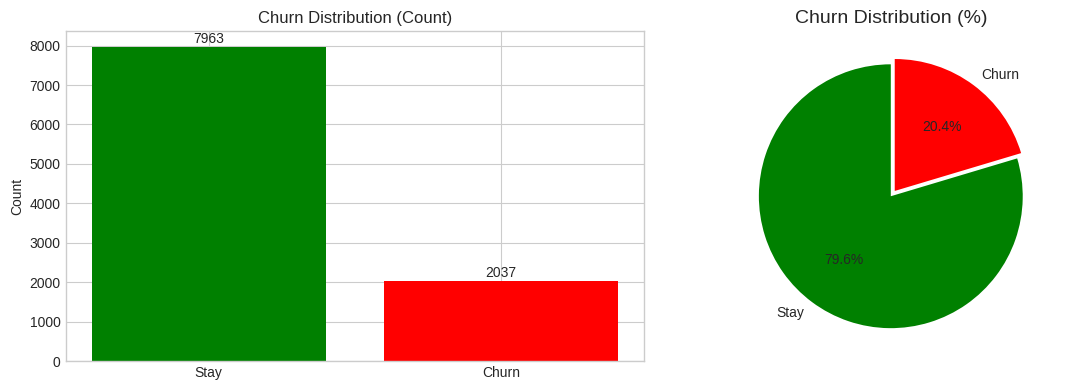

Imbalance Ratio: 3.91:1 (Stay:Churn)
Churn Rate: 20.4%


In [73]:
# Target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count
churn_counts = df['Exited'].value_counts()
colors = ['green', 'red']
axes[0].bar(['Stay', 'Churn'], churn_counts.values, color=colors)
axes[0].set_title('Churn Distribution (Count)')
axes[0].set_ylabel('Count')
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 100, str(v), ha='center')

# Percentage pie chart
axes[1].pie(churn_counts.values, labels=['Stay', 'Churn'], autopct='%1.1f%%', 
            colors=colors, explode=[0, 0.05], startangle=90)
axes[1].set_title('Churn Distribution (%)', fontsize=14)

plt.tight_layout()
plt.show()

# Summary
print(f"Imbalance Ratio: {churn_counts[0]/churn_counts[1]:.2f}:1 (Stay:Churn)")
print(f"Churn Rate: {churn_counts[1]/len(df)*100:.1f}%")

## 4. Numerical Features Distribution

In [74]:
# Define feature groups
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_cols = ['Geography', 'Gender']
binary_cols = ['HasCrCard', 'IsActiveMember']
id_cols = ['CustomerId', 'Surname']
target = 'Exited'

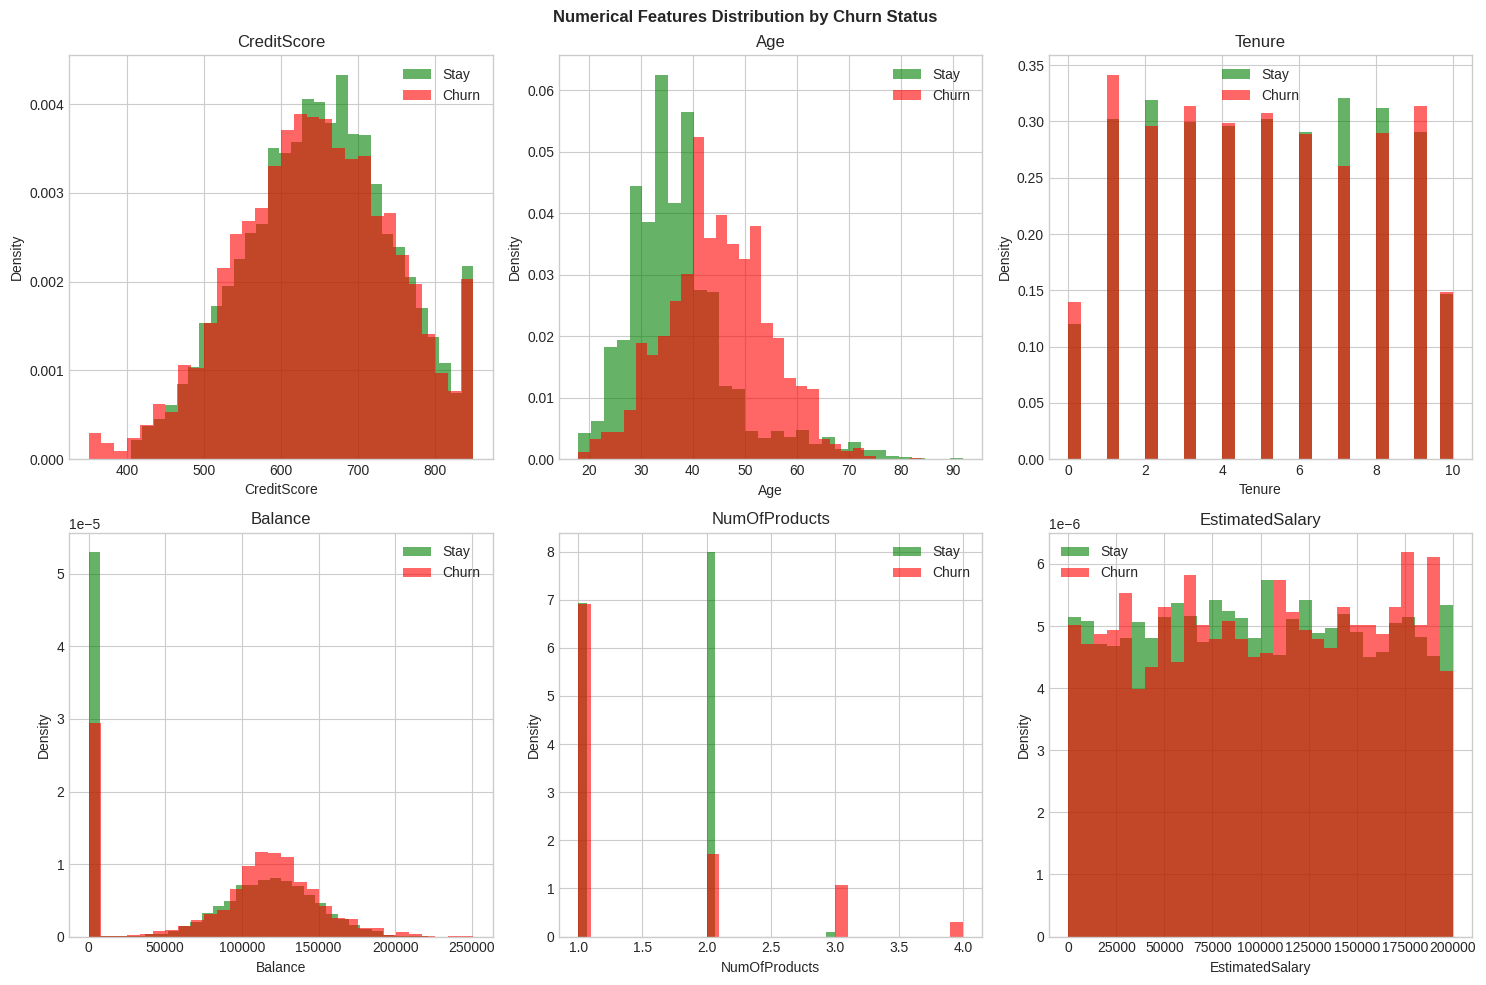

In [75]:
# Numerical features distribution with churn overlay
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    # Plot distributions for each class
    for label, color in zip([0, 1], colors):
        data = df[df['Exited'] == label][col]
        ax.hist(data, bins=30, alpha=0.6, label=f"{'Stay' if label == 0 else 'Churn'}", 
                color=color, density=True)
    
    ax.set_title(f'{col}')
    ax.legend()
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

plt.suptitle('Numerical Features Distribution by Churn Status', fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Categorical Features Analysis

In [76]:
df.groupby('Geography')['Exited'].mean()

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64

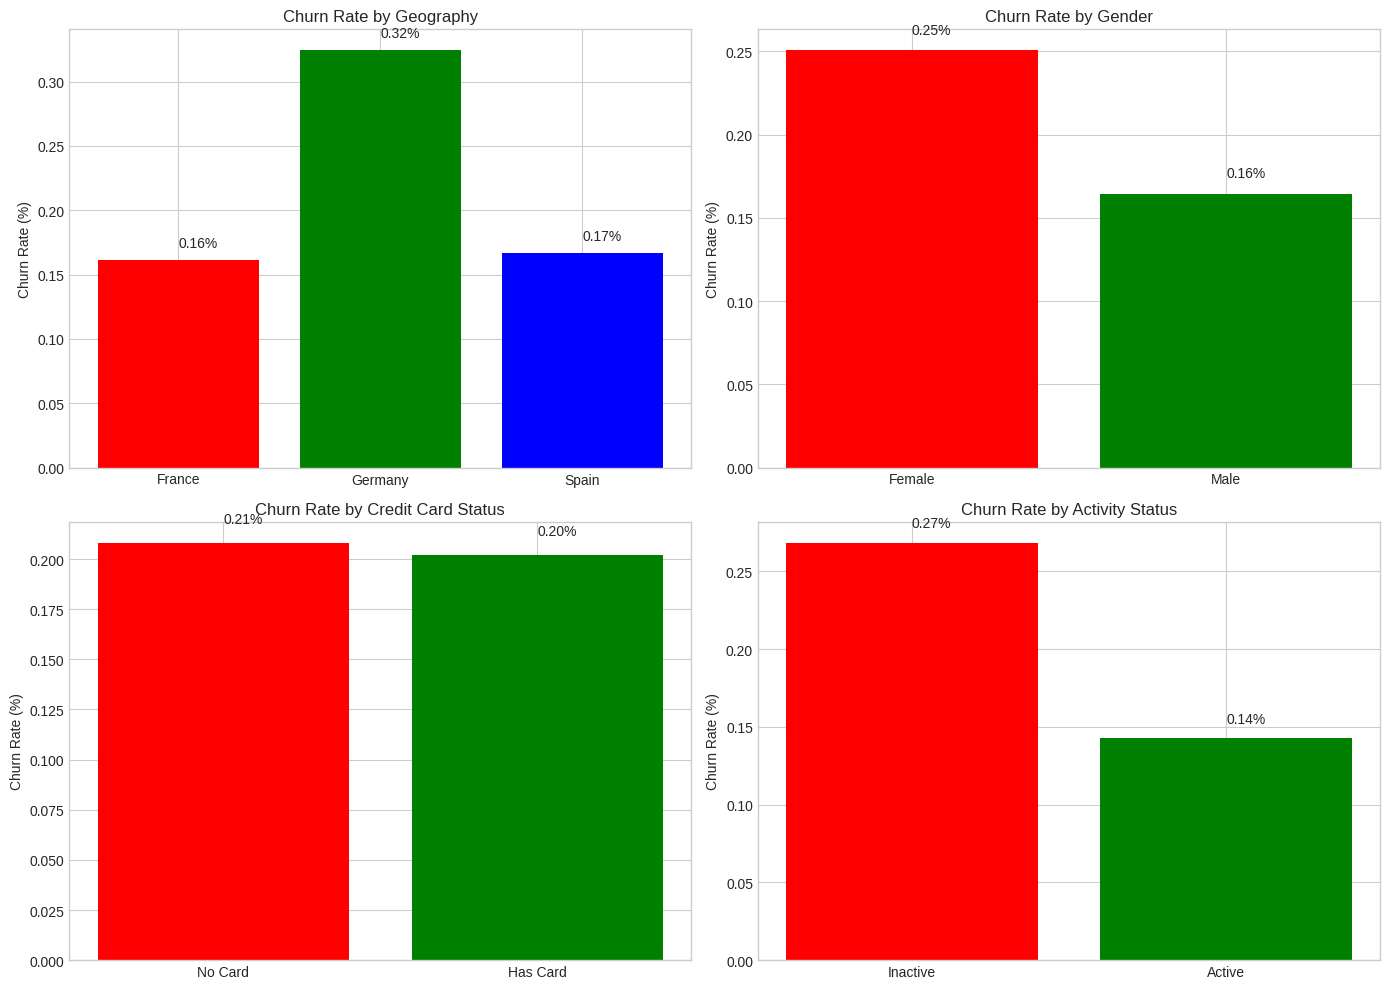

In [77]:
# Categorical and binary features vs Churn
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Geography
ax = axes[0, 0]
churn_by_geo = df.groupby('Geography')['Exited'].mean()
bars = ax.bar(churn_by_geo.index, churn_by_geo.values, color=['red', 'green', 'blue'])
ax.set_title('Churn Rate by Geography')
ax.set_ylabel('Churn Rate (%)')
for bar, val in zip(bars, churn_by_geo.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{val:.2f}%')

# Gender
ax = axes[0, 1]
churn_by_gender = df.groupby('Gender')['Exited'].mean()
bars = ax.bar(churn_by_gender.index, churn_by_gender.values, color=['red', 'green'])
ax.set_title('Churn Rate by Gender')
ax.set_ylabel('Churn Rate (%)')
for bar, val in zip(bars, churn_by_gender.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{val:.2f}%')

# HasCrCard
ax = axes[1, 0]
churn_by_card = df.groupby('HasCrCard')['Exited'].mean()
bars = ax.bar(['No Card', 'Has Card'], churn_by_card.values, color=['red', 'green'])
ax.set_title('Churn Rate by Credit Card Status')
ax.set_ylabel('Churn Rate (%)')
for bar, val in zip(bars, churn_by_card.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{val:.2f}%')

# IsActiveMember
ax = axes[1, 1]
churn_by_active = df.groupby('IsActiveMember')['Exited'].mean()
bars = ax.bar(['Inactive', 'Active'], churn_by_active.values, color=['red', 'green'])
ax.set_title('Churn Rate by Activity Status')
ax.set_ylabel('Churn Rate (%)')
for bar, val in zip(bars, churn_by_active.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{val:.2f}%')

plt.tight_layout()
plt.show()

## 6. Correlation Analysis

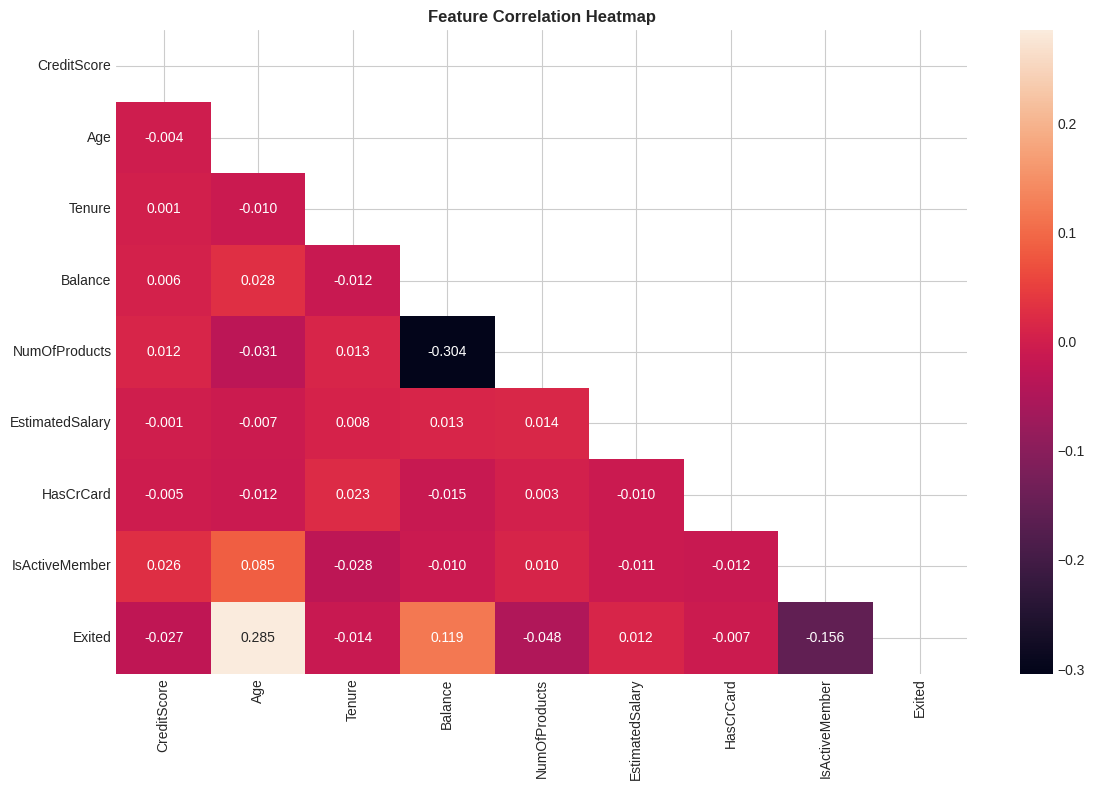

Correlation with Target (Exited):
  Age               : +0.285
  IsActiveMember    : -0.156
  Balance           : +0.119
  NumOfProducts     : -0.048
  CreditScore       : -0.027
  Tenure            : -0.014
  EstimatedSalary   : +0.012
  HasCrCard         : -0.007


In [79]:
# Correlation heatmap

# get numeric columns
numeric_df = df[numerical_cols + binary_cols + [target]]

plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.3f')
plt.title('Feature Correlation Heatmap', fontweight='bold')
plt.tight_layout()
plt.show()

# Correlation with target
print("Correlation with Target (Exited):")
print("=" * 40)
target_corr = corr_matrix['Exited'].drop('Exited').sort_values(key=abs, ascending=False)
for feature, corr in target_corr.items():
    print(f"  {feature:18s}: {corr:+.3f}")

## Key Insights

1. **Class Imbalance**: ~20% churn rate - will need SMOTE or class weights
2. **Geography Impact**: Germany has significantly higher churn rate
3. **Activity Status**: Inactive members churn ~2x more than active members
4. **Age Pattern**: Older customers tend to churn more
5. **Balance**: Higher balance customers show higher churn possibility???